# ML class final project part2
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df(folder, ball_type,number):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    for i in folder_dir:
        if i==ball_type:
            print(i)
            j = os.listdir(folder+"/"+i)
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    dst = cv2.Canny(img, 50, 200, None, 3)
                    dst1 = cv2.Canny(img, 50, 200, None, 3)
                    lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    gray = cv2.medianBlur(gray, 5)
                    rows = gray.shape[0]
                    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                    param1=100, param2=30,
                                    minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(number)
                    if lines is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(len(lines))
                    if circles is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(circles.shape[1])
                    
                    my_list.extend(histogram_r)
                    my_list.extend(histogram_g)
                    my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

    
    print("creating df")
    cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    for h in range(256):
        cols.append("r"+str(h))
    for h in range(256):
        cols.append("g"+str(h))
    for h in range(256):
        cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 
              
    return df


def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        for k in range(len(j)):
            try:
                img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                
                # histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                # histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                # histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                
                dst = cv2.Canny(img, 50, 200, None, 3)
                # dst1 = cv2.Canny(img, 50, 200, None, 3)
                # lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                
                # gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                # gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                # gray = cv2.medianBlur(gray, 5)
                # rows = gray.shape[0]
                # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                #                 param1=100, param2=30,
                #                 minRadius=10, maxRadius=100)
                
                my_list=[]
                my_list.append(folder+"/"+i+"/"+j[k])
                my_list.append(i)
                my_list.append(c)
                # if lines is None:
                #     my_list.append(0)
                #     my_list.append(0)   
                # else:
                #     my_list.append(1)
                #     my_list.append(len(lines))
                # if circles is None:
                #     my_list.append(0)
                #     my_list.append(0)   
                # else:
                #     my_list.append(1)
                #     my_list.append(circles.shape[1])
                
                # my_list.extend(histogram_r)
                # my_list.extend(histogram_g)
                # my_list.extend(histogram_b)
                # my_list.extend(img.flatten())
                my_list.extend(dst.flatten())

                big_list.append(my_list)
                count+=1
                
            except:
                print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    # cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    cols = ['path','class_name','class_number']
    # for h in range(256):
    #     cols.append("r"+str(h))
    # for h in range(256):
    #     cols.append("g"+str(h))
    # for h in range(256):
    #     cols.append("b"+str(h))
    # for h in range(200*200*3):
    #     cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_edge_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [4]:
# full_ball_edge_df.shape
# full_ball_edge_df.head()

In [5]:
# full_ball_edge_df.to_csv('edge.csv', index=False)

In [6]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [7]:
# full_test_df.to_csv('final_test_data_edge.csv', index=False)

import the data with some/all features

In [8]:
edge = pd.read_csv('edge.csv')
del edge['path']
del edge['class_name']
ball_type = [0,2,9,11]
edge_4balls = edge.loc[edge['class_number'].isin(ball_type)]
edge_4balls.shape

(1543, 40001)

In [9]:
X = edge_4balls.drop(['class_number'], axis=1)
y = edge_4balls['class_number']

train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
pca1=PCA(n_components=100)
X_train5=pca1.fit_transform(X_train)
X_test5=pca1.transform(X_test)
y_train5 = y_train
y_test5 = y_test

print(X_train5.shape)
print(X_test5.shape)


(1080, 100)
(463, 100)


extra functions

In [12]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [13]:
# list to hold all final results
results=[]

model imports

In [14]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



# RUN ON DATA SET WITH EDGES PCA 100

#### SVM

In [15]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass

OneVsOneClassifier


hinge l2 40.39 %
squared_hinge l2 40.39 %
OutputCodeClassifier
hinge l2 35.42 %
squared_hinge l2 41.9 %
OneVsRestClassifier
hinge l2 34.56 %
squared_hinge l2 34.56 %


              precision    recall  f1-score   support

           0       0.37      0.35      0.36       112
           2       0.41      0.33      0.36       106
           9       0.36      0.49      0.41       106
          11       0.37      0.33      0.35       139

    accuracy                           0.37       463
   macro avg       0.37      0.37      0.37       463
weighted avg       0.37      0.37      0.37       463

37.15 %


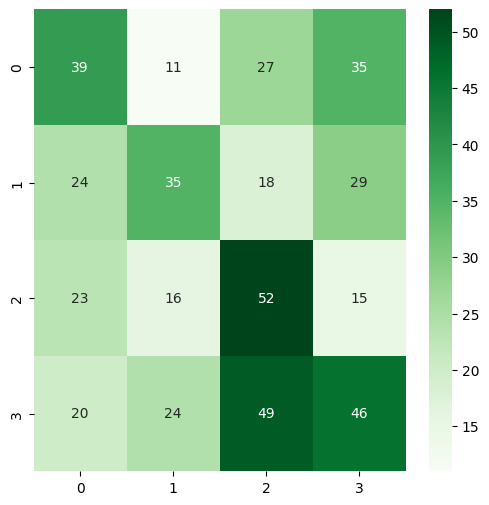

In [16]:
svm5 =  OutputCodeClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train5, y_train5)
pred_svm5 = svm5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_svm5))
print(classification_report(y_test5, pred_svm5))
print(round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'SVM',round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100 ])

#### KNN

In [17]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train5,y_train5)
    pred_knn = neigh.predict(X_test5)
    print(i,round(np.sum([y_test5==pred_knn])/len(y_test5),4)*100,"%")

1 57.02 %
2 52.7 %
3 52.7 %
4 48.6 %
5 49.89 %
6 48.809999999999995 %
7 49.68 %
8 50.54 %
9 47.73 %
10 46.87 %
11 48.38 %
12 48.6 %
13 47.73 %
14 48.16 %
15 47.949999999999996 %
16 48.16 %
17 47.3 %
18 47.949999999999996 %
19 49.24 %
20 49.03 %
21 47.3 %
22 47.3 %
23 47.08 %
24 47.949999999999996 %
25 48.6 %
26 49.24 %
27 48.6 %
28 47.73 %
29 47.73 %
30 47.3 %
31 47.52 %
32 47.949999999999996 %
33 47.73 %
34 46.87 %
35 47.3 %
36 47.52 %
37 47.52 %
38 47.52 %
39 46.87 %
40 46.87 %
41 46.650000000000006 %
42 46.22 %
43 46.44 %
44 47.3 %
45 48.16 %
46 48.38 %
47 48.38 %
48 47.73 %
49 47.52 %
50 47.08 %


              precision    recall  f1-score   support

           0       0.60      0.49      0.54       112
           2       0.53      0.56      0.54       106
           9       0.49      0.56      0.52       106
          11       0.65      0.65      0.65       139

    accuracy                           0.57       463
   macro avg       0.57      0.56      0.56       463
weighted avg       0.57      0.57      0.57       463

57.02 %


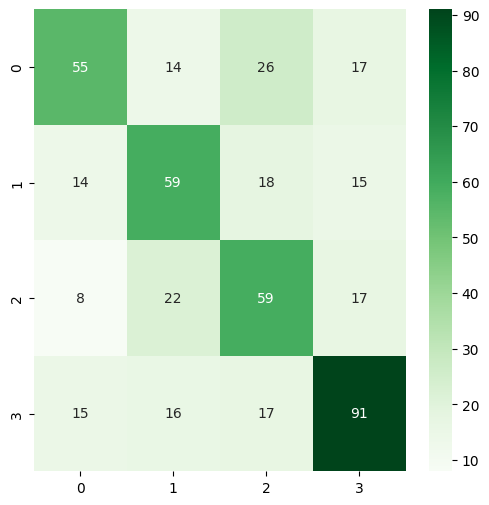

In [18]:
neigh5 = KNeighborsClassifier(n_neighbors=1)
neigh5.fit(X_train5,y_train5)
pred_knn5 = neigh5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_knn5))
print(classification_report(y_test5, pred_knn5))
print(round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'KNN',round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100 ])

#### Adaboost

In [19]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train5,y_train5)
    pred_ada = ada.predict(X_test5)
    print(i,round(np.sum([y_test5==pred_ada])/len(y_test5),4)*100,"%")

50 44.49 %
100 47.08 %
150 45.79 %
200 47.73 %
250 48.16 %
300 47.08 %
350 47.52 %
400 46.650000000000006 %
450 47.3 %
500 48.6 %
550 47.949999999999996 %
600 49.68 %
650 49.46 %
700 49.03 %
750 49.46 %
800 49.24 %
850 50.32 %
900 49.46 %
950 48.38 %
1000 48.809999999999995 %
1050 47.73 %
1100 51.190000000000005 %
1150 50.760000000000005 %
1200 50.11 %
1250 49.89 %
1300 50.11 %
1350 50.11 %
1400 50.760000000000005 %
1450 50.54 %
1500 50.760000000000005 %
1550 49.89 %
1600 50.970000000000006 %
1650 50.54 %
1700 49.68 %
1750 49.68 %
1800 49.24 %
1850 50.760000000000005 %
1900 51.190000000000005 %
1950 51.4 %
2000 51.4 %


              precision    recall  f1-score   support

           0       0.39      0.47      0.43       112
           2       0.58      0.40      0.47       106
           9       0.51      0.46      0.49       106
          11       0.56      0.65      0.60       139

    accuracy                           0.51       463
   macro avg       0.51      0.49      0.50       463
weighted avg       0.51      0.51      0.50       463

50.54 %


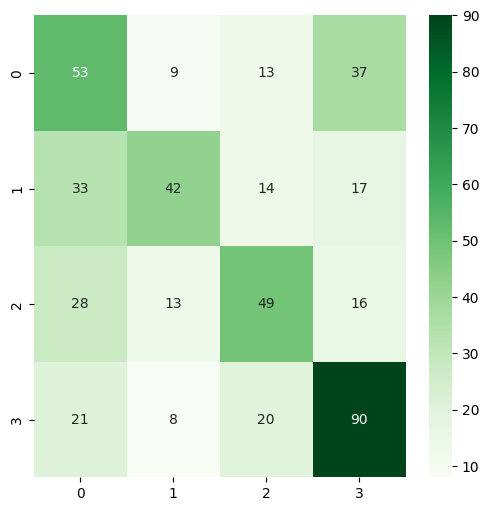

In [20]:
ada5 = AdaBoostClassifier(n_estimators=1650, algorithm="SAMME",random_state=0)
ada5.fit(X_train5,y_train5)
pred_ada5 = ada5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_ada5))
print(classification_report(y_test5, pred_ada5))
print(round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'Adaboost',round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100 ])

#### Random Forest

In [21]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train5,y_train5)
        pred_RF = RF.predict(X_test5)
        print(i,j,round(np.sum([y_test5==pred_RF])/len(y_test5),4)*100,"%")

40 2 52.92 %
40 3 52.92 %
40 4 56.37 %
60 2 53.349999999999994 %
60 3 55.510000000000005 %
60 4 57.24 %
80 2 56.8 %
80 3 54.86 %
80 4 59.4 %
100 2 56.16 %
100 3 54.0 %
100 4 57.24 %
120 2 56.37 %
120 3 54.64 %
120 4 57.02 %
140 2 57.879999999999995 %
140 3 55.28999999999999 %
140 4 58.75 %
160 2 57.67 %
160 3 54.86 %
160 4 57.879999999999995 %
180 2 55.720000000000006 %
180 3 55.08 %
180 4 57.02 %
200 2 55.510000000000005 %
200 3 55.510000000000005 %
200 4 56.8 %
220 2 56.37 %
220 3 55.510000000000005 %
220 4 56.589999999999996 %
240 2 56.8 %
240 3 54.86 %
240 4 56.589999999999996 %
260 2 57.02 %
260 3 54.64 %
260 4 56.16 %
280 2 56.37 %
280 3 54.64 %
280 4 55.94 %
300 2 57.02 %
300 3 54.86 %
300 4 56.589999999999996 %
320 2 57.02 %
320 3 55.08 %
320 4 57.24 %
340 2 56.589999999999996 %
340 3 55.94 %
340 4 57.24 %
360 2 56.37 %
360 3 55.08 %
360 4 56.8 %
380 2 56.37 %
380 3 55.510000000000005 %
380 4 56.16 %
400 2 57.02 %
400 3 55.720000000000006 %
400 4 56.8 %
420 2 57.02 %
420 3 55.9

              precision    recall  f1-score   support

           0       0.54      0.48      0.51       112
           2       0.80      0.34      0.48       106
           9       0.50      0.57      0.53       106
          11       0.57      0.81      0.67       139

    accuracy                           0.57       463
   macro avg       0.60      0.55      0.55       463
weighted avg       0.60      0.57      0.56       463

56.8 %


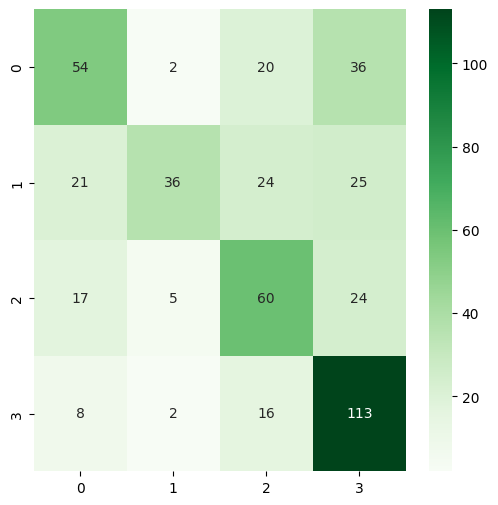

In [22]:
RF5 = RandomForestClassifier(n_estimators=80, max_depth=None,min_samples_split=2, random_state=0)
RF5.fit(X_train5,y_train5)
pred_RF5 = RF5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_RF5))
print(classification_report(y_test5, pred_RF5))
print(round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'Random Forest',round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100 ])

#### Logistic Regression

In [23]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train5,y_train5)
                pred_LR = LR.predict(X_test5)
                print(i,j,k,round(np.sum([y_test5==pred_LR])/len(y_test5),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 49.24 %
l1 liblinear 0.01 49.24 %
l1 liblinear 0.001 49.24 %
l1 saga 0.1 47.3 %
l1 saga 0.01 47.73 %
l1 saga 0.001 47.3 %
l2 lbfgs 0.1 47.73 %
l2 lbfgs 0.01 47.73 %
l2 lbfgs 0.001 47.73 %
l2 liblinear 0.1 47.3 %
l2 liblinear 0.01 47.08 %
l2 liblinear 0.001 48.809999999999995 %
l2 newton-cg 0.1 48.16 %
l2 newton-cg 0.01 48.16 %
l2 newton-cg 0.001 48.16 %
l2 sag 0.1 47.08 %
l2 sag 0.01 47.3 %
l2 sag 0.001 47.52 %
l2 saga 0.1 47.3 %
l2 saga 0.01 47.73 %
l2 saga 0.001 47.3 %


              precision    recall  f1-score   support

           0       0.49      0.34      0.40       112
           2       0.43      0.46      0.45       106
           9       0.41      0.47      0.44       106
          11       0.54      0.59      0.56       139

    accuracy                           0.47       463
   macro avg       0.47      0.47      0.46       463
weighted avg       0.48      0.47      0.47       463

47.3 %


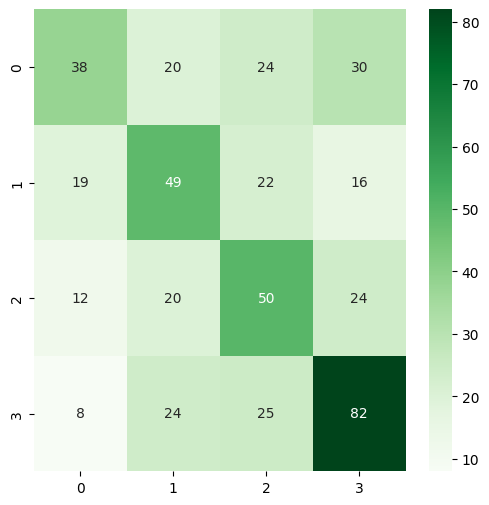

In [24]:
LR5 = LogisticRegression(penalty="l1", solver="saga", tol=0.1, max_iter=10000, random_state=0)
LR5.fit(X_train5,y_train5)
pred_LR5 = LR5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_LR5))
print(classification_report(y_test5, pred_LR5))
print(round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'Logistic Regression',round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100 ])

# RUN ON DATA SET WITH EDGES PCA 400

In [25]:
pca2=PCA(n_components=400)
X_train8=pca2.fit_transform(X_train)
X_test8=pca2.transform(X_test)
y_train8 = y_train
y_test8 = y_test

print(X_train8.shape)
print(X_test8.shape)

(1080, 400)
(463, 400)


#### SVM

In [26]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train8, y_train8)
            pred_svm = svm.predict(X_test8)
            print(i,j,round(np.sum([y_test8==pred_svm])/len(y_test8),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train8, y_train8)
            pred_svm = svm.predict(X_test8)
            print(i,j,round(np.sum([y_test8==pred_svm])/len(y_test8),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train8, y_train8)
            pred_svm = svm.predict(X_test8)
            print(i,j,round(np.sum([y_test8==pred_svm])/len(y_test8),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 50.970000000000006 %
squared_hinge l2 50.970000000000006 %
OutputCodeClassifier
hinge l2 44.49 %
squared_hinge l2 43.63 %
OneVsRestClassifier
hinge l2 44.71 %
squared_hinge l2 44.71 %


              precision    recall  f1-score   support

           0       0.44      0.42      0.43       112
           2       0.53      0.58      0.56       106
           9       0.45      0.51      0.48       106
          11       0.61      0.53      0.56       139

    accuracy                           0.51       463
   macro avg       0.51      0.51      0.51       463
weighted avg       0.51      0.51      0.51       463

50.970000000000006 %


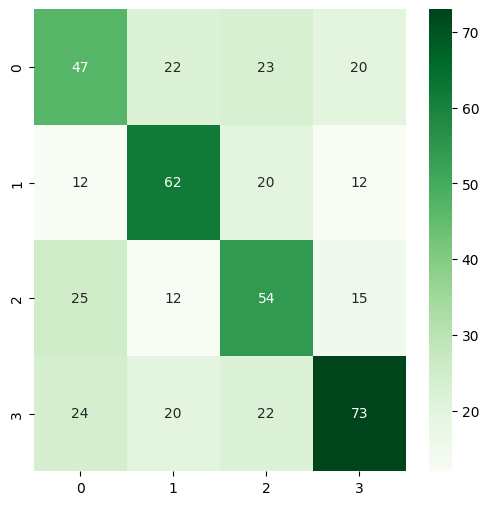

In [27]:
svm8 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train8, y_train8)
pred_svm8 = svm8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_svm8))
print(classification_report(y_test8, pred_svm8))
print(round(np.sum([y_test8==pred_svm8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'SVM',round(np.sum([y_test8==pred_svm8])/len(y_test8),4)*100 ])

#### KNN

In [28]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train8,y_train8)
    pred_knn = neigh.predict(X_test8)
    print(i,round(np.sum([y_test8==pred_knn])/len(y_test8),4)*100,"%")

1 47.949999999999996 %
2 42.980000000000004 %
3 39.739999999999995 %
4 42.76 %
5 40.82 %
6 40.6 %
7 40.17 %
8 39.519999999999996 %
9 39.739999999999995 %
10 39.09 %
11 38.01 %
12 37.8 %
13 37.8 %
14 36.720000000000006 %
15 38.66 %
16 36.720000000000006 %
17 37.15 %
18 37.580000000000005 %
19 36.720000000000006 %
20 35.64 %
21 36.5 %
22 36.720000000000006 %
23 36.29 %
24 36.93 %
25 35.64 %
26 35.64 %
27 36.29 %
28 35.85 %
29 35.21 %
30 35.42 %
31 36.07 %
32 35.21 %
33 35.21 %
34 35.85 %
35 35.85 %
36 34.339999999999996 %
37 34.56 %
38 35.42 %
39 34.99 %
40 34.99 %
41 34.99 %
42 34.13 %
43 34.339999999999996 %
44 34.77 %
45 33.26 %
46 33.48 %
47 33.26 %
48 33.26 %
49 34.13 %
50 33.050000000000004 %


              precision    recall  f1-score   support

           0       0.52      0.48      0.50       112
           2       0.37      0.18      0.24       106
           9       0.42      0.56      0.48       106
          11       0.55      0.65      0.59       139

    accuracy                           0.48       463
   macro avg       0.46      0.47      0.45       463
weighted avg       0.47      0.48      0.46       463

47.949999999999996 %


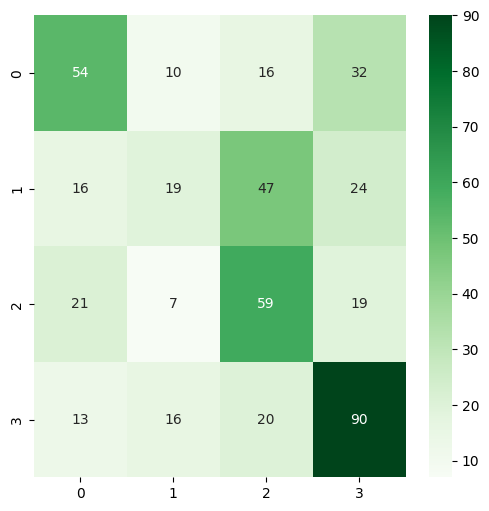

In [29]:
neigh8 = KNeighborsClassifier(n_neighbors=1)
neigh8.fit(X_train8,y_train8)
pred_knn8 = neigh8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_knn8))
print(classification_report(y_test8, pred_knn8))
print(round(np.sum([y_test8==pred_knn8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'KNN',round(np.sum([y_test8==pred_knn8])/len(y_test8),4)*100 ])

#### Adaboost

In [30]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train8,y_train8)
    pred_ada = ada.predict(X_test8)
    print(i,round(np.sum([y_test8==pred_ada])/len(y_test8),4)*100,"%")

50 38.66 %
100 39.31 %
150 41.68 %
200 40.39 %
250 41.25 %
300 44.71 %
350 42.33 %
400 41.04 %
450 41.9 %
500 43.41 %
550 42.76 %
600 43.41 %
650 43.63 %
700 42.33 %
750 42.55 %
800 42.120000000000005 %
850 41.9 %
900 42.120000000000005 %
950 42.76 %
1000 41.68 %
1050 43.41 %
1100 42.120000000000005 %
1150 43.2 %
1200 44.06 %
1250 42.980000000000004 %
1300 42.980000000000004 %
1350 44.06 %
1400 44.49 %
1450 43.63 %
1500 44.49 %
1550 44.06 %
1600 45.14 %
1650 44.49 %
1700 42.55 %
1750 43.2 %
1800 43.41 %
1850 43.84 %
1900 43.2 %
1950 44.28 %
2000 43.2 %


              precision    recall  f1-score   support

           0       0.35      0.36      0.35       112
           2       0.81      0.12      0.21       106
           9       0.39      0.60      0.47       106
          11       0.49      0.59      0.54       139

    accuracy                           0.43       463
   macro avg       0.51      0.42      0.39       463
weighted avg       0.51      0.43      0.40       463

42.980000000000004 %


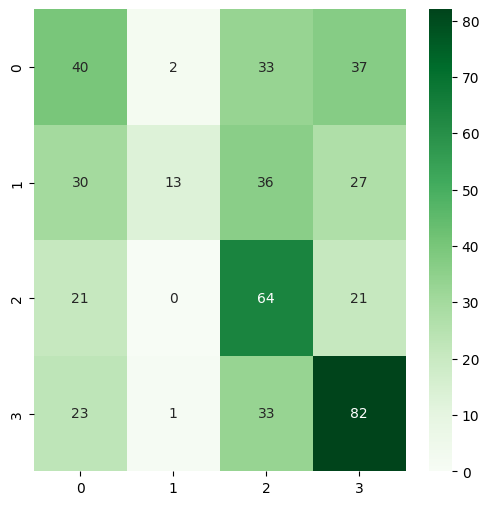

In [31]:
ada8 = AdaBoostClassifier(n_estimators=1250, algorithm="SAMME",random_state=0)
ada8.fit(X_train8,y_train8)
pred_ada8 = ada8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_ada8))
print(classification_report(y_test8, pred_ada8))
print(round(np.sum([y_test8==pred_ada8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'Adaboost',round(np.sum([y_test8==pred_ada8])/len(y_test8),4)*100 ])

#### Random Forest

In [32]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train8,y_train8)
        pred_RF = RF.predict(X_test8)
        print(i,j,round(np.sum([y_test8==pred_RF])/len(y_test8),4)*100,"%")

40 2 48.38 %
40 3 46.22 %
40 4 48.16 %
60 2 47.949999999999996 %
60 3 49.03 %
60 4 47.3 %
80 2 48.6 %
80 3 47.3 %
80 4 47.949999999999996 %
100 2 48.16 %
100 3 46.22 %
100 4 48.16 %
120 2 47.3 %
120 3 47.52 %
120 4 49.03 %
140 2 48.38 %
140 3 46.87 %
140 4 48.38 %
160 2 48.16 %
160 3 47.3 %
160 4 47.949999999999996 %
180 2 49.24 %
180 3 46.650000000000006 %
180 4 47.73 %
200 2 49.89 %
200 3 46.22 %
200 4 48.6 %
220 2 49.68 %
220 3 47.08 %
220 4 49.89 %
240 2 49.68 %
240 3 47.08 %
240 4 49.46 %
260 2 49.24 %
260 3 47.3 %
260 4 49.68 %
280 2 49.24 %
280 3 47.08 %
280 4 49.46 %
300 2 48.809999999999995 %
300 3 46.650000000000006 %
300 4 49.46 %
320 2 49.24 %
320 3 47.3 %
320 4 50.32 %
340 2 50.54 %
340 3 47.73 %
340 4 50.11 %
360 2 49.89 %
360 3 47.08 %
360 4 50.32 %
380 2 49.68 %
380 3 47.08 %
380 4 49.89 %
400 2 50.32 %
400 3 47.08 %
400 4 49.24 %
420 2 50.970000000000006 %
420 3 47.3 %
420 4 49.46 %
440 2 50.32 %
440 3 47.52 %
440 4 49.24 %
460 2 49.89 %
460 3 48.16 %
460 4 49.46 %
480

              precision    recall  f1-score   support

           0       0.52      0.28      0.36       112
           2       1.00      0.17      0.29       106
           9       0.43      0.66      0.52       106
          11       0.49      0.79      0.61       139

    accuracy                           0.49       463
   macro avg       0.61      0.47      0.45       463
weighted avg       0.60      0.49      0.46       463

49.46 %


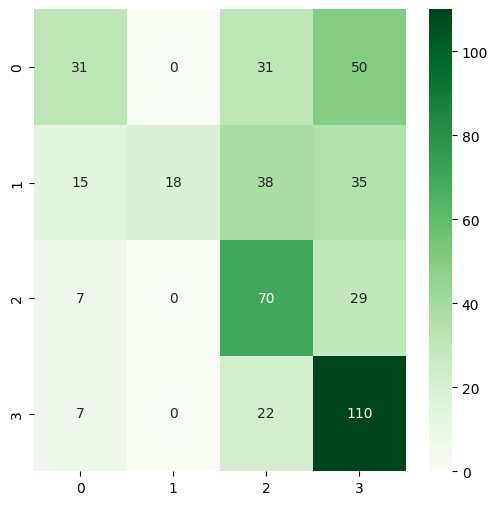

In [33]:
RF8 = RandomForestClassifier(n_estimators=240, max_depth=None,min_samples_split=4, random_state=0)
RF8.fit(X_train8,y_train8)
pred_RF8 = RF8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_RF8))
print(classification_report(y_test8, pred_RF8))
print(round(np.sum([y_test8==pred_RF8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'Random Forest',round(np.sum([y_test8==pred_RF8])/len(y_test8),4)*100 ])

#### Logistic Regression

In [34]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train8,y_train8)
                pred_LR = LR.predict(X_test8)
                print(i,j,k,round(np.sum([y_test8==pred_LR])/len(y_test8),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 50.54 %
l1 liblinear 0.01 50.11 %
l1 liblinear 0.001 50.11 %
l1 saga 0.1 49.24 %
l1 saga 0.01 49.89 %
l1 saga 0.001 50.970000000000006 %
l2 lbfgs 0.1 48.38 %
l2 lbfgs 0.01 48.16 %
l2 lbfgs 0.001 48.6 %
l2 liblinear 0.1 46.650000000000006 %
l2 liblinear 0.01 46.650000000000006 %
l2 liblinear 0.001 49.03 %
l2 newton-cg 0.1 49.46 %
l2 newton-cg 0.01 48.809999999999995 %
l2 newton-cg 0.001 48.6 %
l2 sag 0.1 48.809999999999995 %
l2 sag 0.01 49.89 %
l2 sag 0.001 49.03 %
l2 saga 0.1 49.24 %
l2 saga 0.01 50.11 %
l2 saga 0.001 50.970000000000006 %


              precision    recall  f1-score   support

           0       0.48      0.41      0.44       112
           2       0.50      0.55      0.52       106
           9       0.45      0.54      0.49       106
          11       0.61      0.54      0.57       139

    accuracy                           0.51       463
   macro avg       0.51      0.51      0.51       463
weighted avg       0.52      0.51      0.51       463

50.970000000000006 %


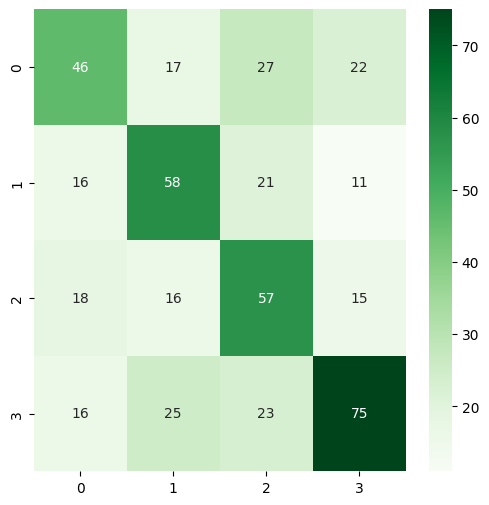

In [37]:
LR8 = LogisticRegression(penalty="l1", solver="saga", tol=0.001, max_iter=10000, random_state=0)
LR8.fit(X_train8,y_train8)
pred_LR8 = LR8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_LR8))
print(classification_report(y_test8, pred_LR8))
print(round(np.sum([y_test8==pred_LR8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'Logistic Regression',round(np.sum([y_test8==pred_LR8])/len(y_test8),4)*100 ])

In [38]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [39]:
df

,df_type,classifier,accuracy
0,edges PCA 100,SVM,37.15
1,edges PCA 100,KNN,57.02
2,edges PCA 100,Adaboost,50.54
3,edges PCA 100,Random Forest,56.80
4,edges PCA 100,Logistic Regression,47.30
5,edges PCA 400,SVM,50.97
6,edges PCA 400,KNN,47.95
7,edges PCA 400,Adaboost,42.98
8,edges PCA 400,Random Forest,49.46
9,edges PCA 400,Logistic Regression,50.97


In [40]:
import pickle
filenames = ['svm5.sav','knn5.sav','ada5.sav','RF5.sav','LR5.sav','svm8.sav','knn8.sav','ada8.sav','RF8.sav','LR8.sav']
models= [svm5,neigh5,ada5,RF5,LR5,svm8,neigh8,ada8,RF8,LR8]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))